<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Acidentes_Rodovias_Federais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Acidentes de Trânsito nas Rodovias Federais no Brasil

## OBS.: Análise em construção!!

- Fonte: https://portal.prf.gov.br/dados-abertos-acidentes

## 01. Importando as Bibliotecas Necessárias

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 02. Importando as Bases de Dados

In [65]:
df_07 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2007.csv", sep=';', encoding='latin-1')
df_08 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2008.csv", sep=';', encoding='latin-1')
df_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2009.csv", sep=';', encoding='latin-1')
df_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2010.csv", sep=';', encoding='latin-1')
df_11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2011.csv", sep=';', encoding='latin-1')
df_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2012.csv", sep=';', encoding='latin-1')
df_13 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2013.csv", sep=';', encoding='latin-1')
df_14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2014.csv", sep=';', encoding='latin-1')
df_15 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2015.csv", sep=';', encoding='latin-1')
df_16 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2016.csv", sep=';', encoding='latin-1')
df_17 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2017.csv", sep=';', encoding='latin-1')
df_18 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2018.csv", sep=';', encoding='latin-1')
df_19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2019.csv", sep=';', encoding='latin-1')
df_20 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2020.csv", sep=';', encoding='latin-1')

df = df_20.append(df_19.append(df_18.append(df_17.append(df_16.append(df_15.append(df_14.append(df_13.append(df_12.append(df_11.append(df_10.append(df_09.append(df_08.append(df_07)))))))))))))

In [66]:
dataset = df.copy()

## 03. Conhecendo os Dados e Fazendo as Primeiras Análises

In [67]:
dataset.head(3)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Não,5,0,0,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,2,1,0,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ,NaN
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC,NaN


In [68]:
print("Quantidade de Valoes Únicos por Variável:\n")
dataset.nunique().to_frame().T

Quantidade de Valoes Únicos por Variável:



,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,ano
0,1734679,5114,14,1486,28,322,27970,4097,84,45,5,10,6,24,7,22,7,81,20,52,39,67,48,60,22,192836,193586,55,369,236,9


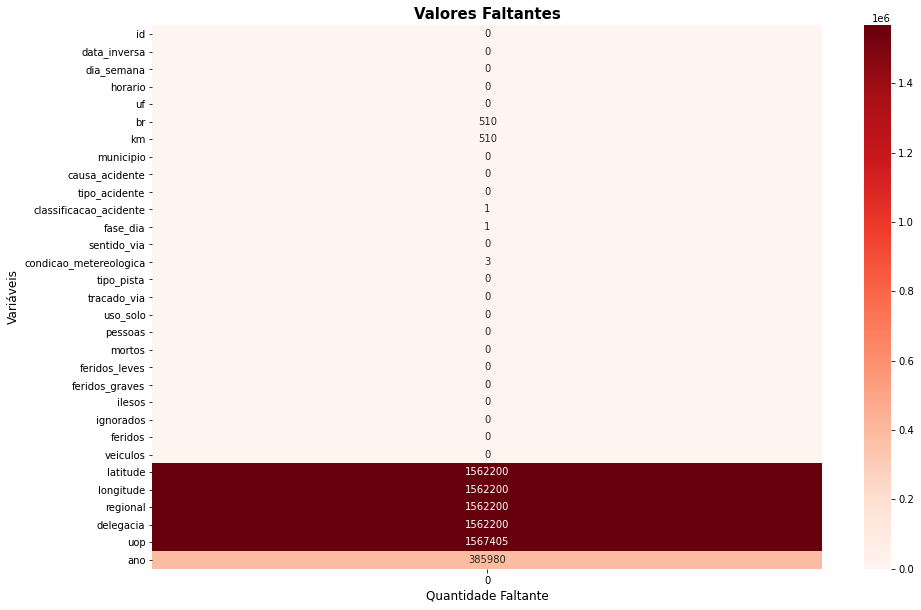

In [69]:
plt.figure(figsize=(15,10))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='Reds')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

**Há muitos valores faltantes para as variáveis (Esses campos serão descartados para esta análise):**

- latitude, longitude, regional, delegacia, uop e ano.

**Quais perguntas eu quero responder a priori?**

- Qual a quantidade de acidentes em rodovias federais por ano no Brasil?
- Os acidentes estão diminuindo ou aumentando?
- As mortes em acidentes de trânsito estão diminuindo ou aumentando?
- Quais as maiores causas de cidente de trânsito, por ano e por tipo?
- O dia da semana tem relação com os acidentes?
- Quais os estados/regiões que mais causam acidentes?

...

In [70]:
dataset = dataset.drop(columns=['latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ano'])

### 3.1. Acidentes por Ano, Mês e Comportamento das Séries Temporais

**Quantidade de Acidentes em Rodovias Federais no Brasil por ano**

In [71]:
dataset.data_inversa = pd.to_datetime(dataset.data_inversa)
dataset["Ano"] = dataset.data_inversa.dt.year
dataset["Mes"] = dataset.data_inversa.dt.month

acidentes = dataset.groupby(["Ano"])[["id"]].count()
acidentes.columns.name = "Acidentes"
acidentes.T

Ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Acidentes,,,,,,,,,,,,,,
id,127675,141043,158646,183469,192326,184568,186748,169201,122161,96363,89518,69206,67446,63447


In [72]:
acidentes["Acumulado"] = [acidentes.id[:i+1].sum() for i in range(acidentes.shape[0])]
acidentes["Media_Movel"] = [round(acidentes.id[:i+1].mean()) for i in range(acidentes.shape[0])]
acidentes.rename(columns={"id":"Qtd"}, inplace=True)

acidentes["Relativo_ano_anterior_(%)"] = acidentes.Qtd
for i in range(acidentes.shape[0]):
  if i == 0: acidentes["Relativo_ano_anterior_(%)"].iloc[i] = 1
  else: acidentes["Relativo_ano_anterior_(%)"].iloc[i] = round((acidentes["Qtd"].iloc[i]/acidentes["Qtd"].iloc[i-1])-1,4)*100
acidentes.reset_index(inplace=True)
acidentes

Acidentes,Ano,Qtd,Acumulado,Media_Movel,Relativo_ano_anterior_(%)
0,2007,127675,127675,127675,1.00
1,2008,141043,268718,134359,10.47
2,2009,158646,427364,142455,12.48
3,2010,183469,610833,152708,15.65
4,2011,192326,803159,160632,4.83
5,2012,184568,987727,164621,-4.03
6,2013,186748,1174475,167782,1.18
7,2014,169201,1343676,167960,-9.40
8,2015,122161,1465837,162871,-27.80
9,2016,96363,1562200,156220,-21.12


**Entendendo os números com gráficos**

In [73]:
acidentes_tot = dataset.groupby(["Ano","Mes"])[["id"]].count().reset_index()
acidentes_tot["Ano_mes"] = acidentes_tot.Ano.map(str) + "-" + acidentes_tot.Mes.map(str)
acidentes_tot.Ano_mes = pd.to_datetime(acidentes_tot.Ano_mes) #Se não transformasse em uma série temporal, todos os meses apareceriam (ficaria inviável visualizar o eixo x)

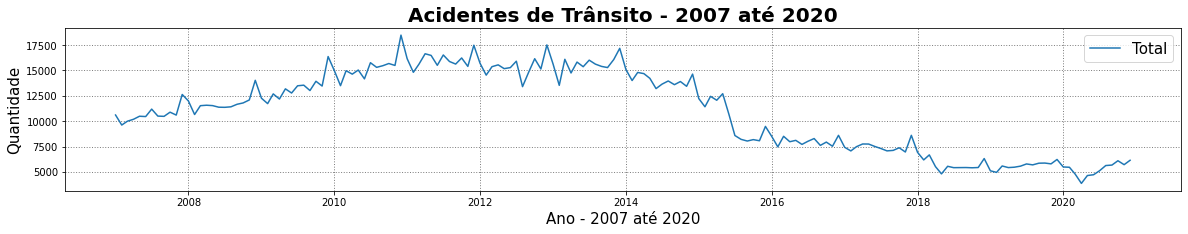

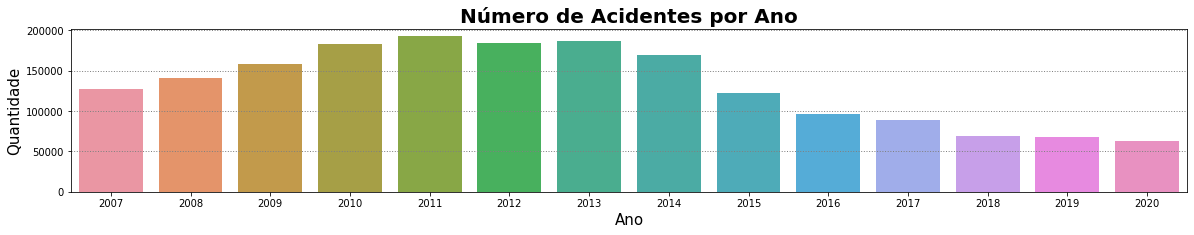

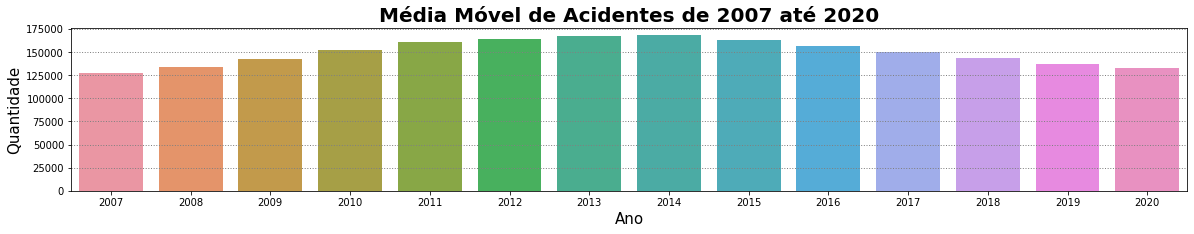

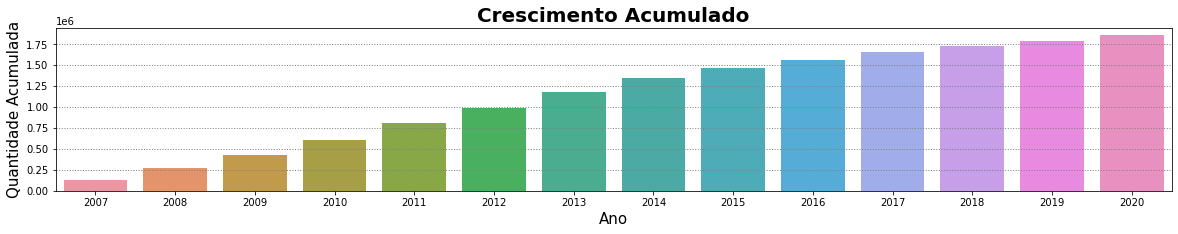

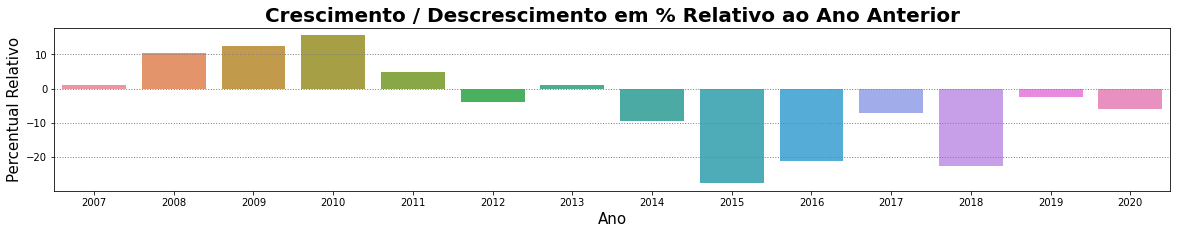

In [74]:
plt.figure(figsize=(20,3));
ax0=sns.lineplot(data=acidentes_tot,x=acidentes_tot.Ano_mes,y="id");
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(color='gray', linestyle='dotted', linewidth=1);
plt.title('Acidentes de Trânsito - 2007 até 2020',fontweight='bold', fontsize=20);
plt.xlabel("Ano - 2007 até 2020", fontsize=15);
plt.ylabel("Quantidade", fontsize=15);
plt.legend(["Total"], fontsize=15);

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Número de Acidentes por Ano',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Qtd")
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Média Móvel de Acidentes de 2007 até 2020',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Media_Movel")
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Crescimento Acumulado',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Acumulado")
ax.set_ylabel("Quantidade Acumulada", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Crescimento / Descrescimento em % Relativo ao Ano Anterior',fontweight='bold', fontsize=20)
ax = sns.barplot(data=acidentes, x="Ano", y="Relativo_ano_anterior_(%)")
ax.set_ylabel("Percentual Relativo", fontsize=15)
ax.set_xlabel("Ano", fontsize=15);

**Visão Mensal dos Acidentes**

In [75]:
acidentes_mes_ano = pd.crosstab(dataset.Ano, dataset.Mes)
acidentes_mes_ano.rename(columns={1:'Jan',2:'Fev',3:'Mar',4:'Abr',5:'Mai',6:'Jun',7:'Jul',8:'Ago',9:'Set',10:'Out',11:'Nov',12:'Dez'},inplace=True)
acidentes_mes_ano

Mes,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano,,,,,,,,,,,,
2007,10611,9624,9997,10191,10490,10459,11191,10504,10479,10890,10605,12634
2008,11994,10659,11529,11574,11536,11380,11368,11417,11669,11798,12092,14027
2009,12264,11733,12689,12186,13186,12775,13487,13548,13019,13932,13462,16365
2010,14987,13499,14971,14635,15037,14170,15759,15303,15464,15679,15491,18474
2011,16154,14813,15612,16641,16477,15502,16520,15879,15626,16225,15397,17480
2012,15710,14537,15369,15548,15176,15277,15909,13403,14836,16152,15141,17510
2013,15630,13532,16095,14750,15821,15365,16011,15620,15395,15282,16071,17176
2014,15090,14005,14800,14685,14220,13211,13651,13961,13597,13905,13438,14638
2015,12230,11422,12448,12064,12709,10681,8592,8214,8049,8188,8077,9487


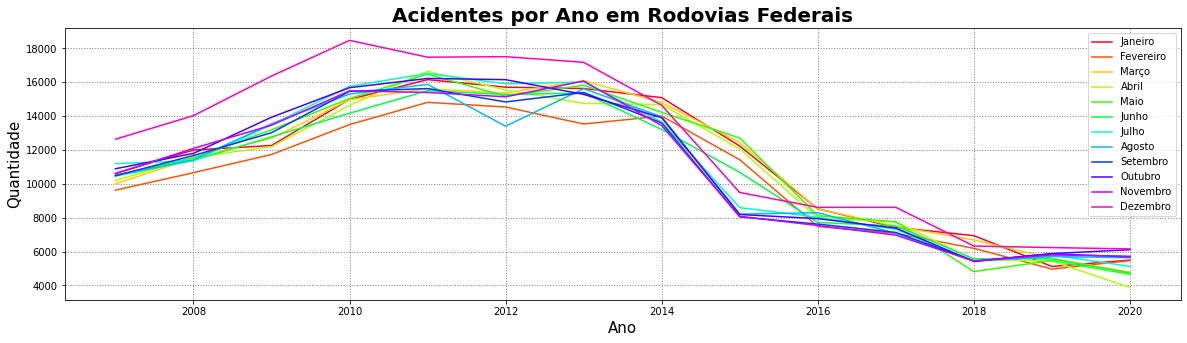

In [76]:
ax = dataset.groupby(["Ano","Mes"])[["id"]].count()
ax=ax.reset_index()

plt.figure(figsize=(20,5))
plt.grid(color='gray', linestyle='dotted', linewidth=1)
plt.title('Acidentes por Ano em Rodovias Federais',fontweight='bold', fontsize=20)
ax = sns.lineplot(data=ax,x="Ano",y="id", hue="Mes", palette='gist_rainbow')
ax.set_ylabel("Quantidade", fontsize=15)
ax.set_xlabel("Ano", fontsize=15)
ax.legend(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]);

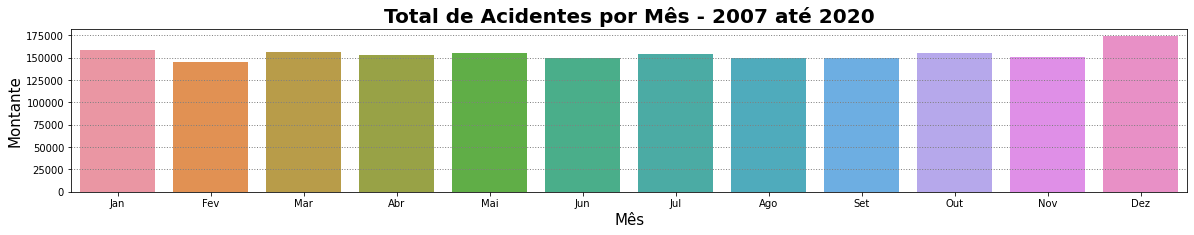

In [77]:
grf=dataset.groupby("Mes")[["data_inversa"]].count()
grf.rename(index={1:'Jan',2:'Fev',3:'Mar',4:'Abr',5:'Mai',6:'Jun',7:'Jul',8:'Ago',9:'Set',10:'Out',11:'Nov',12:'Dez'},inplace=True)
grf.reset_index(inplace=True)

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Total de Acidentes por Mês - 2007 até 2020',fontweight='bold', fontsize=20)
ax = sns.barplot(data=grf, x="Mes", y="data_inversa")
ax.set_ylabel("Montante", fontsize=15)
ax.set_xlabel("Mês", fontsize=15);

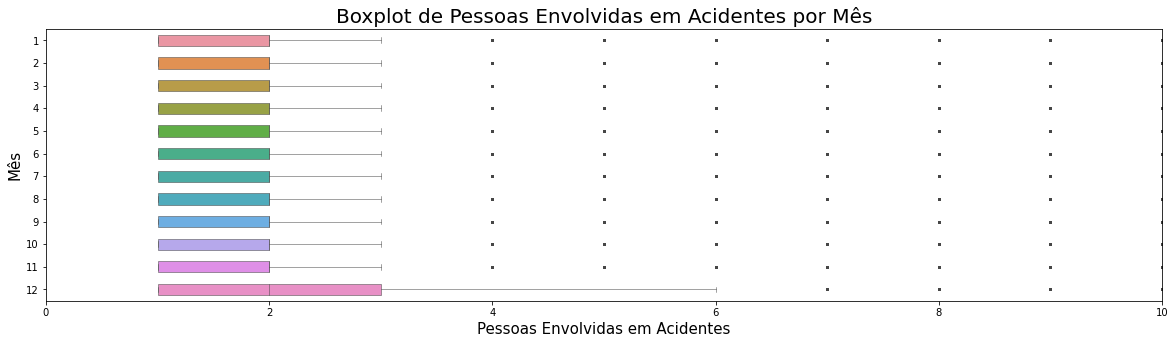

In [78]:
plt.figure(figsize=(20,5))
sns.boxplot(data=dataset, x="pessoas", y="Mes", orient='h', linewidth=0.5,width=0.5, fliersize=1);
plt.xlim(0,10);
plt.title("Boxplot de Pessoas Envolvidas em Acidentes por Mês", fontsize=20);
plt.ylabel("Mês", fontsize=15);
plt.xlabel("Pessoas Envolvidas em Acidentes", fontsize=15);

**Conclusões das Primeiras Perguntas:**

1. Desde 2007, somam-se 1.851.817 acidentes em rodovias federais;
2. Desse montante, é possível perceber que o número de acidentes está em queda desde o ano de 2014;
3. Apesar de a quantidade de acidentes terem tido uma leve queda em 2012 e 2014, a média móvel acumulada de acidentes ainda estava em crescimento, devido aos elevados números em dias anteriores;
4. É possível notar a correlação entre a média móvel e o crescimento/decrescimento relativo dos anos anteriores;
5. O gráfico de Crescimento Acumulado corrobora com a desaceleração do montante de acidentes dos últomos anos;
6. Há uma maior dispersão de pessoas envolvidas em acidentes em dezembro. Talvez seja pelo fato das festas de fim de ano;
7. É possível notar a sazonalidade, com picos nos meses de dezembro, o que reforça o entendimento do item 6.



### Verificando a Relação de Acidentes com Vítimas (feridos e fatais)

In [86]:
dataset_2 = dataset.groupby("Ano")[["pessoas","feridos","mortos","ilesos","ignorados"]].sum().reset_index().rename(columns={"pessoas":"Total"})

In [87]:
acidentes_mes = dataset.groupby(["Ano","Mes"])[["pessoas","feridos","mortos","ilesos","ignorados"]].sum().reset_index()
acidentes_mes["Ano_mes"] = acidentes_mes.Ano.map(str) + "-" + acidentes_mes.Mes.map(str)
acidentes_mes.Ano_mes = pd.to_datetime(acidentes_mes.Ano_mes) #Se não transformasse em uma série temporal, todos os meses apareceriam (ficaria inviável visualizar o eixo x)

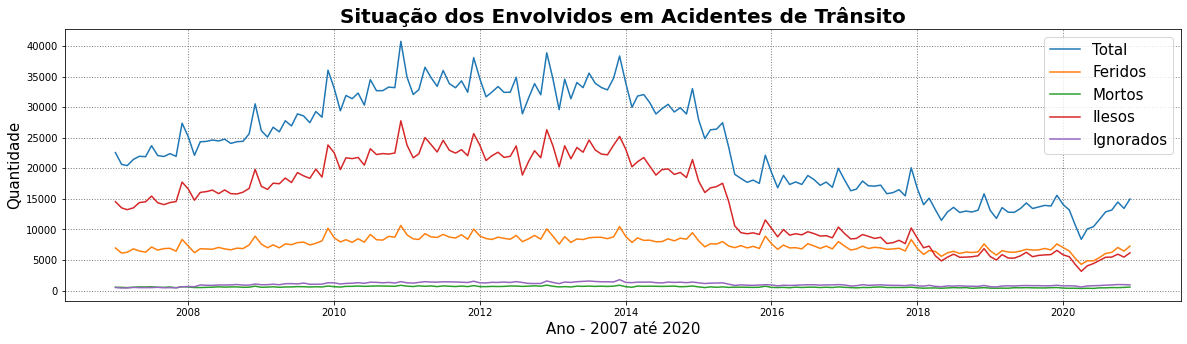

In [88]:
plt.figure(figsize=(20,5));
ax0=sns.lineplot(data=acidentes_mes,x=acidentes_mes.Ano_mes,y="pessoas");
ax1=sns.lineplot(data=acidentes_mes, x=acidentes_mes.Ano_mes,y="feridos");
ax2=sns.lineplot(data=acidentes_mes, x=acidentes_mes.Ano_mes,y="mortos");
ax3=sns.lineplot(data=acidentes_mes, x=acidentes_mes.Ano_mes,y="ilesos");
ax4=sns.lineplot(data=acidentes_mes, x=acidentes_mes.Ano_mes,y="ignorados");
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.grid(color='gray', linestyle='dotted', linewidth=1);
plt.title('Situação dos Envolvidos em Acidentes de Trânsito',fontweight='bold', fontsize=20);
plt.xlabel("Ano - 2007 até 2020", fontsize=15);
plt.ylabel("Quantidade", fontsize=15);
plt.legend(["Total","Feridos","Mortos","Ilesos","Ignorados"], fontsize=15);

**Há uma relativa proporção entre feridos, ilesos e mortos.**

1. Importamte notar que o número de feridos é quase linear ao longo do tempo, em que, mesmo com a queda de envolvidos em acidentes a partir de 2015 não refletiu de maneira significativa no número de feridos;
2. Do ponto 1, pode-se inferir que há possibilidade de os acidentes de 2015 em diante terem sido mais graves, em decorrencia da quenda do número de envolvidos e da de o número de feridos não ter segudo essa queda de maneira proporcional.
3. É possível tomar a mesma inferência para o quantitativo de mortos ao longo dos anos.

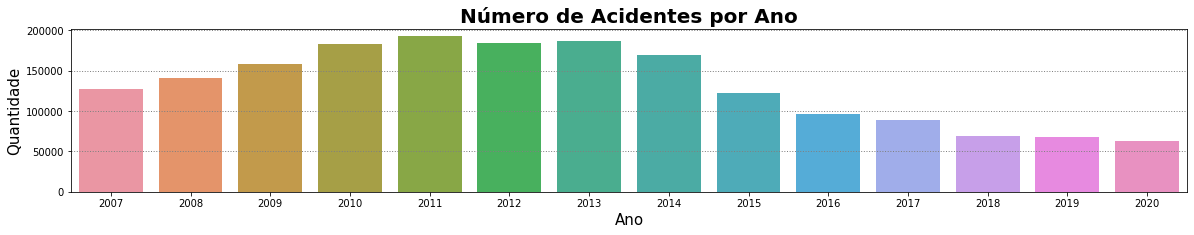

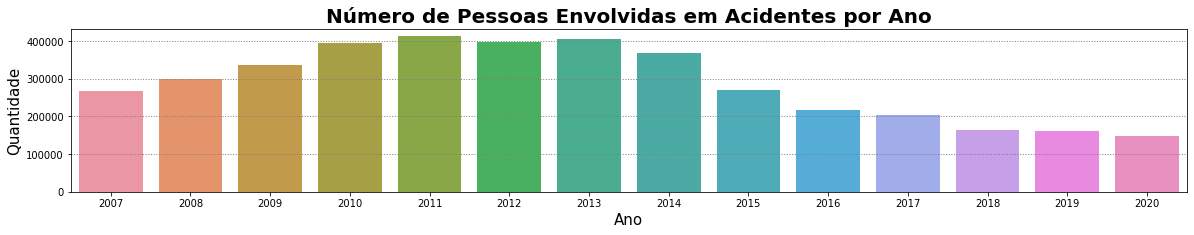

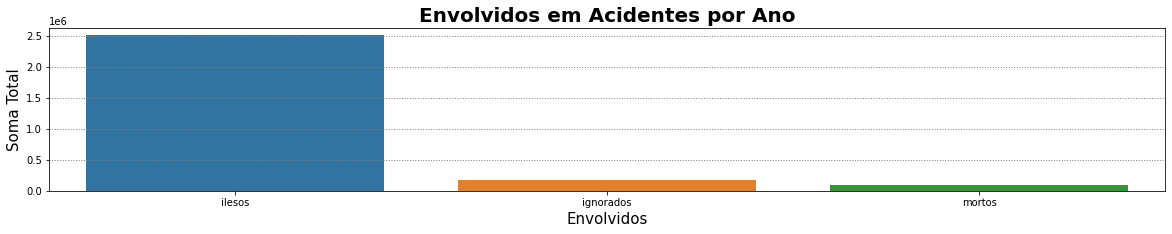

In [89]:
plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Número de Acidentes por Ano',fontweight='bold', fontsize=20)
ax1 = sns.barplot(data=acidentes, x="Ano", y="Qtd")
ax1.set_ylabel("Quantidade", fontsize=15)
ax1.set_xlabel("Ano", fontsize=15);

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Número de Pessoas Envolvidas em Acidentes por Ano',fontweight='bold', fontsize=20)
ax2 = sns.barplot(data=dataset_2, x="Ano", y="Total")
ax2.set_ylabel("Quantidade", fontsize=15)
ax2.set_xlabel("Ano", fontsize=15);

dataset_3=dataset_2[["mortos","ilesos","ignorados"]].sum().to_frame().reset_index().rename(columns={0:"Soma Total","index":"Envolvidos"}).sort_values(by=["Soma Total"], ascending=False)

plt.figure(figsize=(20,3))
plt.grid(color='gray', linestyle=':', linewidth=1)
plt.title('Envolvidos em Acidentes por Ano',fontweight='bold', fontsize=20)
ax3=sns.barplot(data=dataset_3,x="Envolvidos",y="Soma Total")
ax3.set_ylabel("Soma Total", fontsize=15)
ax3.set_xlabel("Envolvidos", fontsize=15);


**Esses números são tristes demais, pois mostram alguns fatos:**

1. Há proporção entre o número de acidentes e pessoas envolvidas;
2. A condição de alguém sair ileso de um acidente não necessariamente indica que todos sairão ilesos.

#### Construindo um DataFrame para a melhor análise

In [90]:
dataset_2["Feridos (%)"] = round((100*dataset_2["feridos"]/dataset_2["Total"]),2)
dataset_2["Feridos_Acum"] = [dataset_2["feridos"][:i+1].sum() for i in range(dataset_2.shape[0])]
dataset_2["Media_Movel_Feridos"] = [round(dataset_2["feridos"][:i+1].mean()) for i in range(dataset_2.shape[0])]

dataset_2["Feridos_Relat_ano_ant_(%)"] = dataset_2.feridos
for i in range(dataset_2.shape[0]):
  if i == 0: dataset_2["Feridos_Relat_ano_ant_(%)"].iloc[i] = 1
  else: dataset_2["Feridos_Relat_ano_ant_(%)"].iloc[i] = round((dataset_2["feridos"].iloc[i]/dataset_2["feridos"].iloc[i-1])-1,4)*100

dataset_2["Mortos (%)"] = round((100*dataset_2["mortos"]/dataset_2["Total"]),2)
dataset_2["Mortos_Acum"] = [dataset_2["mortos"][:i+1].sum() for i in range(dataset_2.shape[0])]
dataset_2["Media_Movel_Mortos"] = [round(dataset_2["mortos"][:i+1].mean()) for i in range(dataset_2.shape[0])]

dataset_2["Mortos_Relat_ano_ant_(%)"] = dataset_2.mortos
for i in range(dataset_2.shape[0]):
  if i == 0: dataset_2["Mortos_Relat_ano_ant_(%)"].iloc[i] = 1
  else: dataset_2["Mortos_Relat_ano_ant_(%)"].iloc[i] = round((dataset_2["mortos"].iloc[i]/dataset_2["mortos"].iloc[i-1])-1,4)*100

acidentes = acidentes.merge(dataset_2, how='inner', on='Ano')
acidentes = acidentes.set_index('Ano')
acidentes

,Qtd,Acumulado,Media_Movel,Relativo_ano_anterior_(%),Total_x,feridos_x,mortos_x,ilesos_x,ignorados_x,Feridos (%)_x,Feridos_Acum_x,Media_Movel_Feridos_x,Feridos_Relat_ano_ant_(%)_x,Mortos (%)_x,Mortos_Acum_x,Media_Movel_Mortos_x,Mortos_Relat_ano_ant_(%)_x,Total_y,feridos_y,mortos_y,ilesos_y,ignorados_y,Feridos (%)_y,Feridos_Acum_y,Media_Movel_Feridos_y,Feridos_Relat_ano_ant_(%)_y,Mortos (%)_y,Mortos_Acum_y,Media_Movel_Mortos_y,Mortos_Relat_ano_ant_(%)_y
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,127675,127675,127675,1.00,268318,81307,6742,174302,5949,30.30,81307,81307,1.00,2.51,6742,6742,1.00,268318,81307,6742,174302,5949,30.30,81307,81307,1.00,2.51,6742,6742,1.00
2008,141043,268718,134359,10.47,298804,84639,6914,196627,10613,28.33,165946,82973,4.10,2.31,13656,6828,2.55,298804,84639,6914,196627,10613,28.33,165946,82973,4.10,2.31,13656,6828,2.55
2009,158646,427364,142455,12.48,337142,93518,7341,223319,12959,27.74,259464,86488,10.49,2.18,20997,6999,6.18,337142,93518,7341,223319,12959,27.74,259464,86488,10.49,2.18,20997,6999,6.18
2010,183469,610833,152708,15.65,395395,103219,8623,268283,15260,26.11,362683,90671,10.37,2.18,29620,7405,17.46,395395,103219,8623,268283,15260,26.11,362683,90671,10.37,2.18,29620,7405,17.46
2011,192326,803159,160632,4.83,412283,106827,8675,280170,16593,25.91,469510,93902,3.50,2.10,38295,7659,0.60,412283,106827,8675,280170,16593,25.91,469510,93902,3.50,2.10,38295,7659,0.60
2012,184568,987727,164621,-4.03,396912,104468,8663,267957,15811,26.32,573978,95663,-2.21,2.18,46958,7826,-0.14,396912,104468,8663,267957,15811,26.32,573978,95663,-2.21,2.18,46958,7826,-0.14
2013,186748,1174475,167782,1.18,405820,103810,8426,276250,17332,25.58,677788,96827,-0.63,2.08,55384,7912,-2.74,405820,103810,8426,276250,17332,25.58,677788,96827,-0.63,2.08,55384,7912,-2.74
2014,169201,1343676,167960,-9.40,368505,100832,8234,243276,16155,27.36,778620,97328,-2.87,2.23,63618,7952,-2.28,368505,100832,8234,243276,16155,27.36,778620,97328,-2.87,2.23,63618,7952,-2.28
2015,122161,1465837,162871,-27.80,269052,90251,6867,159317,12610,33.54,868871,96541,-10.49,2.55,70485,7832,-16.60,269052,90251,6867,159317,12610,33.54,868871,96541,-10.49,2.55,70485,7832,-16.60
